Question 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df1=pd.read_csv('day_1.csv')
df2=pd.read_csv('day_2.csv')

In [4]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)
df.head()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l],DO [g/l]
0,1,100.0,1.0,10.0,6.416,NaN
1,2,150.0,2.0,10.0,48.015,NaN
2,3,120.0,2.0,15.0,27.100,NaN
3,4,150.0,2.5,15.0,57.946,NaN
4,5,150.0,3.0,15.0,57.389,NaN


Question 2

In [5]:
df.isna().sum()

batch                        0
glucose conc [g/l]           2
biomass conc [g/l]           2
DO [mg/l]                   22
gluconic acid conc [g/l]     0
DO [g/l]                    27
dtype: int64

In [6]:
negatives=df < 0
negatives.sum()

batch                       0
glucose conc [g/l]          0
biomass conc [g/l]          1
DO [mg/l]                   0
gluconic acid conc [g/l]    0
DO [g/l]                    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [9]:
m=df['biomass conc [g/l]']
for i in range (len(m)):
    if  m[i] < 0:
        print(i,m[i])

45 -3.0


In [36]:
df.drop(labels=45,inplace=True)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
avg_glucose= df['glucose conc [g/l]'].mean()
df['glucose conc [g/l]'].fillna(avg_glucose, inplace=True)

In [39]:
avg_biomass= df['biomass conc [g/l]'].mean()
df['biomass conc [g/l]'].fillna(avg_biomass, inplace=True)

In [40]:
avg_Domg = df['DO [mg/l]'].mean()
df['DO [mg/l]'].fillna(avg_Domg, inplace=True)

In [ ]:
avg_Dog = df['DO [g/l]'].mean()
df['DO [g/l]'].fillna(avg_Dog, inplace=True)

3:Validate data

In [41]:
df.dtypes

batch                         int64
glucose conc [g/l]          float64
biomass conc [g/l]          float64
DO [mg/l]                   float64
gluconic acid conc [g/l]    float64
DO [g/l]                    float64
dtype: object

In [42]:
df.isna().sum()

batch                        0
glucose conc [g/l]           0
biomass conc [g/l]           0
DO [mg/l]                    0
gluconic acid conc [g/l]     0
DO [g/l]                    26
dtype: int64

In [43]:
df.duplicated().sum()

0

In [45]:
negatives=df < 0
negatives.sum()

batch                       0
glucose conc [g/l]          0
biomass conc [g/l]          0
DO [mg/l]                   0
gluconic acid conc [g/l]    0
DO [g/l]                    0
dtype: int64

4:visualization methods

In [10]:
import matplotlib.pyplot as plt

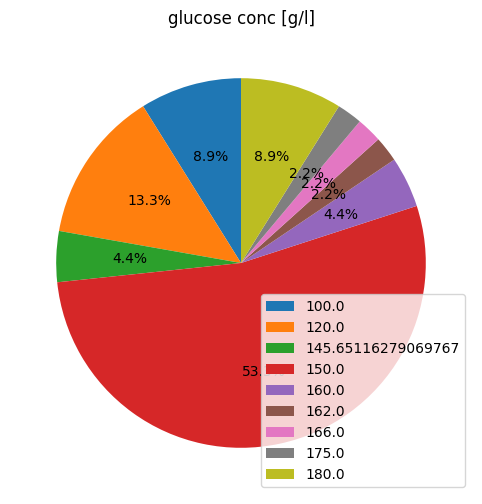

In [47]:
df_glucose= df.groupby('glucose conc [g/l]')['glucose conc [g/l]'].count()
df_glucose
# adjust plot
df_glucose.plot(kind='pie', figsize=(10, 6), labels=None,autopct='%1.1f%%',startangle=90)
# plot title
plt.title('glucose conc [g/l]')
# remove Y-axis label
plt.ylabel('')
# add legend
plt.legend(labels=df_glucose.index, loc='lower right')

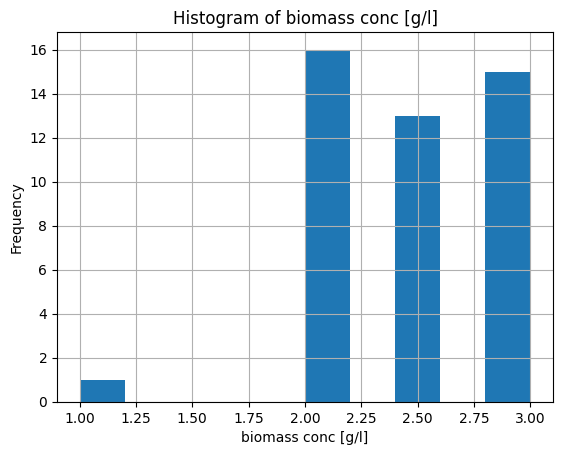

In [51]:
df['biomass conc [g/l]'].plot(kind='hist', bins=10)
# plot title
plt.title('Histogram of biomass conc [g/l]')
# X-axis title
plt.xlabel('biomass conc [g/l]')
# Y-axis title
plt.ylabel('Frequency')
# show grid lines
plt.grid()

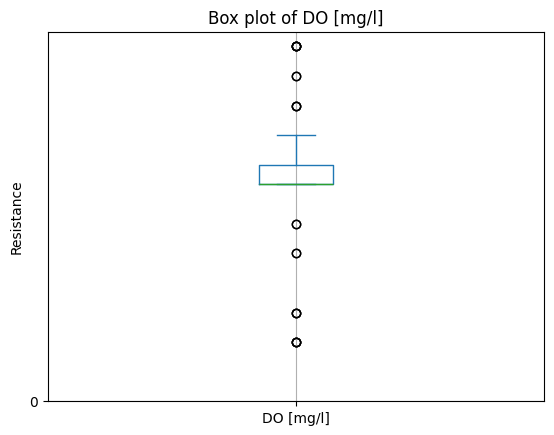

In [49]:
df['DO [mg/l]'].plot(kind='box')
# plot title
plt.title('Box plot of DO [mg/l]')
# Y-axis title
plt.ylabel('Resistance')
# X-axis title
plt.yticks(range(0,1,3))
# show grid lines
plt.grid()


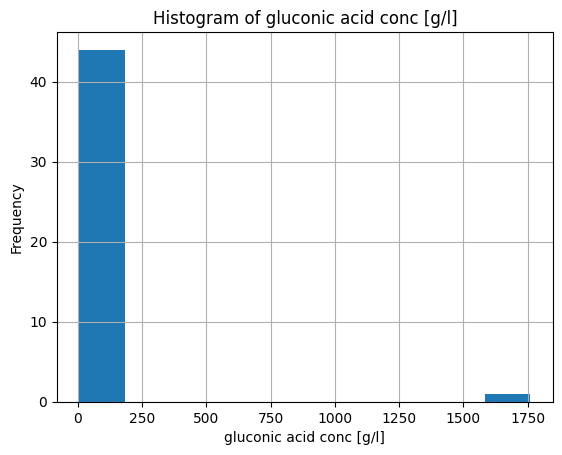

In [50]:
df['gluconic acid conc [g/l]'].plot(kind='hist')
#title
plt.title('Histogram of gluconic acid conc [g/l]')
#X-axis title
plt.xlabel('gluconic acid conc [g/l]')
#Y-axis title
plt.ylabel('Frequency')
#show grid
plt.grid()

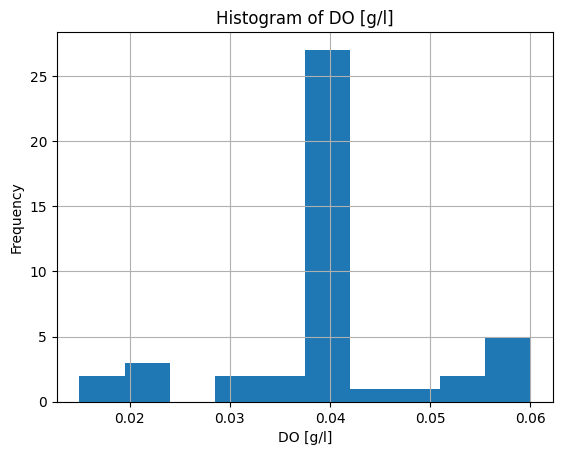

In [ ]:
dfc['DO [g/l]'].plot(kind='hist')
#title
plt.title('Histogram of DO [g/l]')
#X-axis title
plt.xlabel('DO [g/l]')
#Y-axis title
plt.ylabel('Frequency')
#show grid
plt.grid()

5=visualization methods to study the effect of each parameter on the reaction product

In [ ]:
df_glucose_concI= df.groupby('glucose conc [g/l]', as_index=False)['gluconic acid conc [g/l]'].sum()
df_glucose_concI

,glucose conc [g/l],gluconic acid conc [g/l]
0,100.000000,42.718
1,120.000000,236.322
2,145.651163,197.258
3,150.000000,2712.897
4,160.000000,325.487
5,162.000000,164.870
6,166.000000,169.450
7,175.000000,1760.490
8,180.000000,701.670


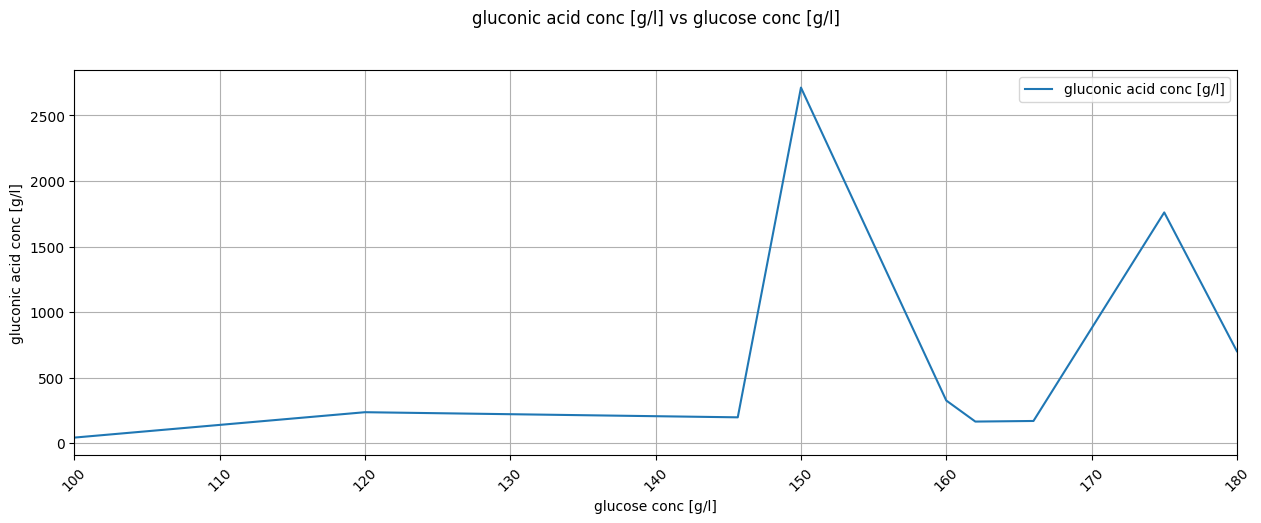

In [ ]:
df_glucose_concI.plot(kind='line', figsize=(15, 5), x='glucose conc [g/l]', y='gluconic acid conc [g/l]')
# plot title
plt.title('gluconic acid conc [g/l] vs glucose conc [g/l]', y=1.1)
# X-axis title
plt.xlabel('glucose conc [g/l]')
# Y-axis title
plt.ylabel('gluconic acid conc [g/l]')
# X-axis ticks/labels
plt.xticks(rotation=45)
# set X margins to 0
plt.margins(x=0)
# show grid lines
plt.grid()


In [54]:
df_gluconicII= df.groupby('biomass conc [g/l]', as_index=False)['gluconic acid conc [g/l]'].sum()
df_gluconicII

,biomass conc [g/l],gluconic acid conc [g/l]
0,1.000000,6.416
1,2.000000,1216.889
2,2.453488,318.634
3,2.500000,1346.619
4,3.000000,3422.604


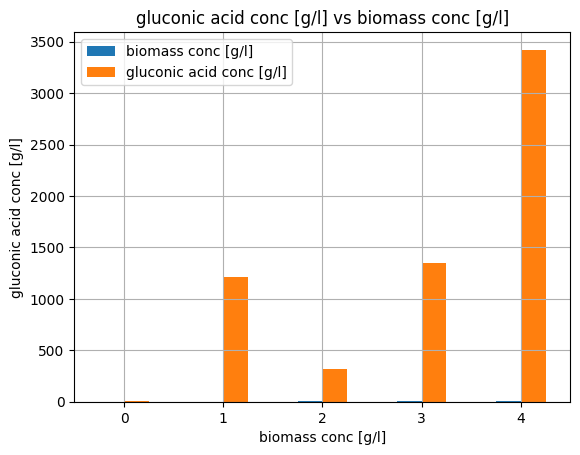

In [55]:
df_gluconicII.plot(kind='bar')
# plot title
plt.title('gluconic acid conc [g/l] vs biomass conc [g/l]')
# X-axis title
plt.xlabel('biomass conc [g/l]')
# Y-axis title
plt.ylabel('gluconic acid conc [g/l]')
# X-axis ticks/labels
plt.xticks(rotation=0)
# show grid lines
plt.grid()

In [28]:
df_gluconicIII= df.groupby('DO [mg/l]', as_index=False)['gluconic acid conc [g/l]'].sum()
df_gluconicIII

,DO [mg/l],gluconic acid conc [g/l]
0,10.0,84.053
1,15.0,142.435
2,25.0,116.748
3,30.0,139.444
4,40.0,386.820
5,45.0,146.036
6,50.0,484.115
7,55.0,1912.930
8,60.0,668.828


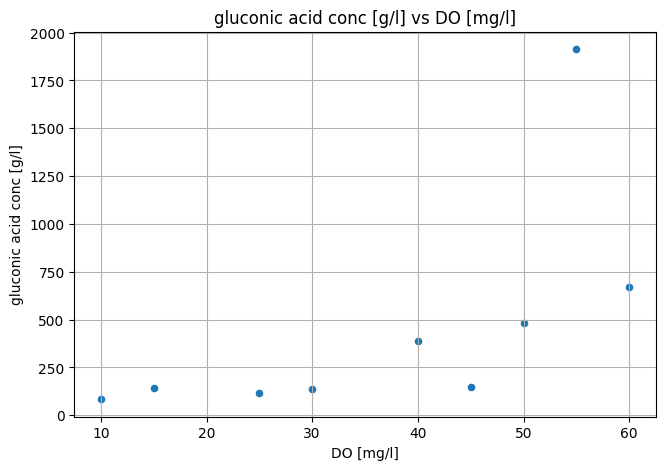

In [31]:
df_gluconicIII.plot(kind='scatter', x='DO [mg/l]', y='gluconic acid conc [g/l]', figsize=(7, 5))
# plot title
plt.title('gluconic acid conc [g/l] vs DO [mg/l]')
# show grid lines
plt.grid()